# Import

You can install prophet on windows.linux, but it seems to be easier for me to use collaboratory.

I based the notebook on :

https://dashee87.github.io/deep%20learning/python/predicting-cryptocurrency-prices-with-deep-learning/

https://coinalysis.wordpress.com/


In [0]:
# import package
! pip install fbprophet

# I had an error with collaboratory with lxml to read html page
! pip3 install lxml 
! pip install html5lib

In [2]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import lxml


# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=" +time.strftime("%Y%m%d"), flavor='html5lib')[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# look at the first few rows
bitcoin_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-09-19,6371.85,6448.46,6208.34,6398.54,4431340000,110074137715
1,2018-09-18,6280.91,6384.18,6265.71,6371.30,4180090000,108492112339
2,2018-09-17,6514.06,6540.21,6257.52,6281.20,3910780000,112508446995
3,2018-09-16,6536.68,6544.33,6460.10,6517.18,3273730000,112887643665
4,2018-09-15,6509.40,6561.72,6493.55,6543.20,3216300000,112405369809


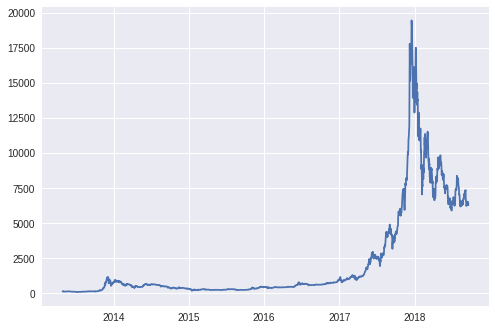

In [3]:
plt.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Open*']) 

In [4]:
from fbprophet import Prophet

# Python

df = bitcoin_market_info[['Date',  'Open*']]
m = Prophet()

# you actually have to change the names of the columns otherwise it does not work
df.columns=['ds','y']
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2331,2019-09-15
2332,2019-09-16
2333,2019-09-17
2334,2019-09-18
2335,2019-09-19


In [6]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2331,2019-09-15,11779.040763,9020.406020,14781.652075
2332,2019-09-16,11788.906797,9211.642951,14673.004295
2333,2019-09-17,11816.297194,9213.846105,14549.901102
2334,2019-09-18,11839.029434,8979.178664,14576.498310
2335,2019-09-19,11862.578991,9081.204729,15018.549158


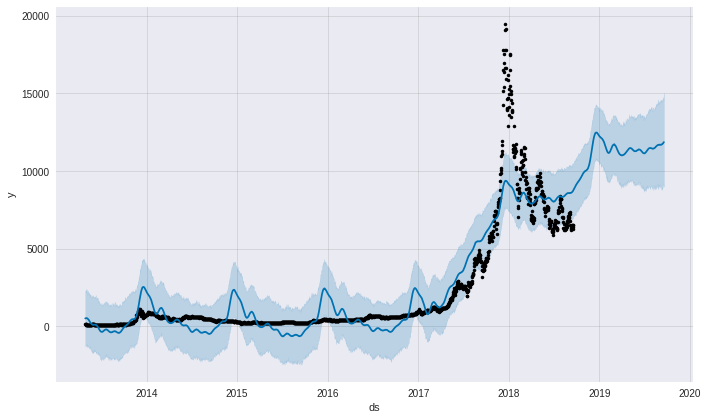

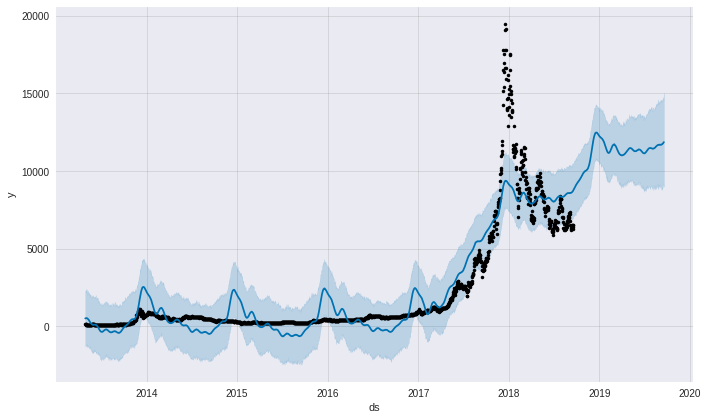

In [7]:
m.plot(forecast)

The trendline seems to give out an increase by the end of each year. I think it is due to the huge increase in last 2017, where the value increase increased suddenly in november.

What is interesting:
*   from the graph bitcoin should still increase next year
*   the prediction for the current price seems rather off
    - the actual price is below the lower estimation
  

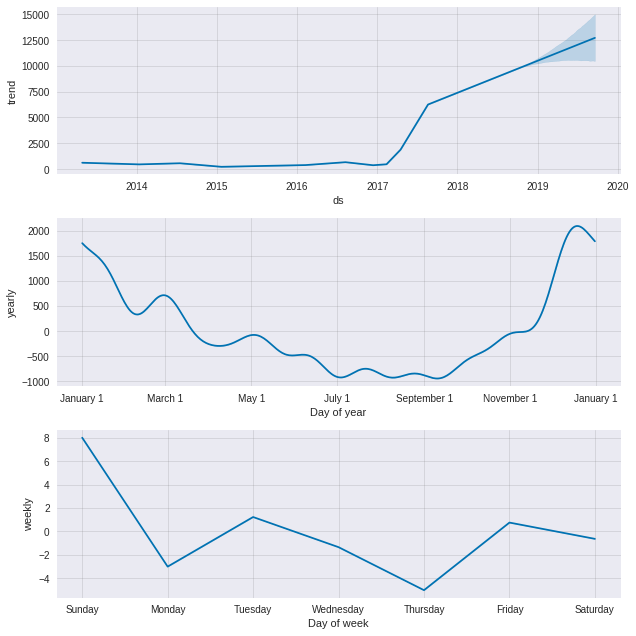

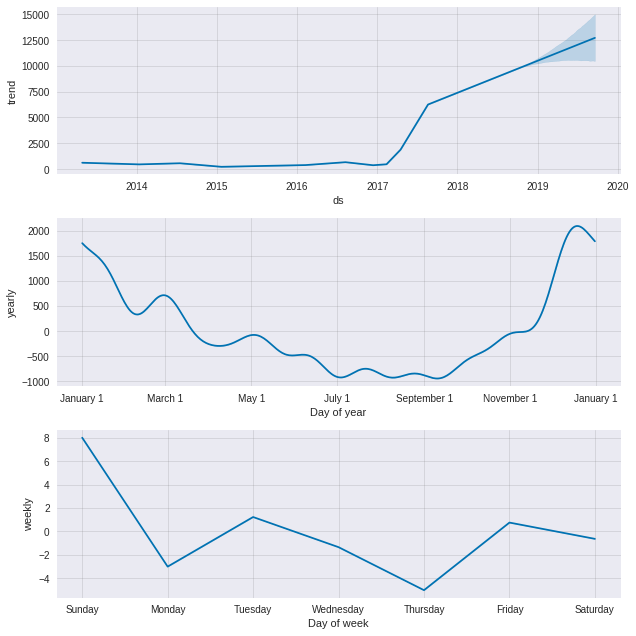

In [8]:
m.plot_components(forecast)

The component of the plot are really interesting.
Showing trend lines, yearly, weekly.

Actually today is thursday and the bitcoin price has indeed decline.


# Prediction recent data 2016 to mid 2017

we are going to redo the same thing but for more recent data.
To see any change in prediction in the future

In [9]:
recent = df[(df.ds > '2016-01-01')& (df.ds < '2017-05-01')]
model_recent = Prophet()
model_recent.fit(recent)
future_recent = model_recent.make_future_dataframe(periods=365)
forecast_recent = model_recent.predict(future_recent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Python
forecast_r = model_recent.predict(future)
forecast_r[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2331,2019-09-15,4019.433904,1716.616625,6109.965425
2332,2019-09-16,4022.083101,1669.262910,6124.776349
2333,2019-09-17,4028.200719,1665.184072,6145.094592
2334,2019-09-18,4032.559670,1664.828767,6113.294778
2335,2019-09-19,4034.464862,1626.639576,6146.870992


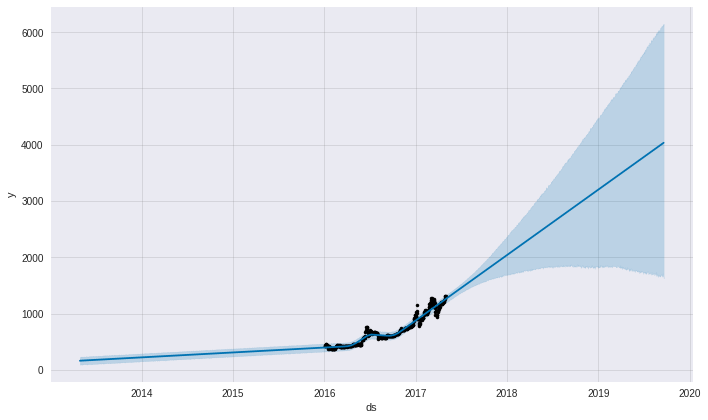

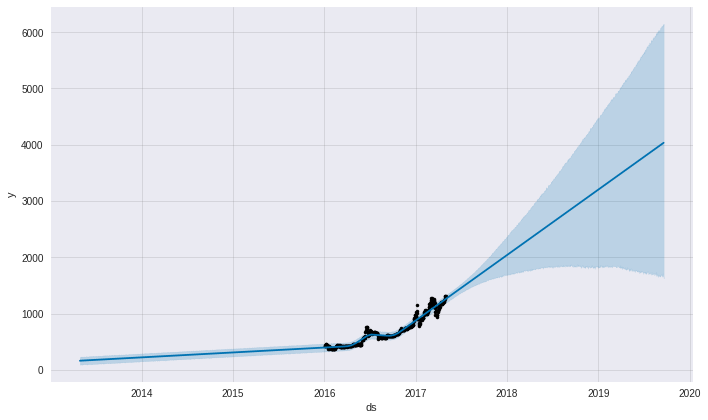

In [11]:
model_recent.plot(forecast_r)

Indeed, without the spurt  of 2017, the prediction gives a continuous increase of the value of bitcoin.

However, the rise is slower:
- 2017 end year value is aroud 20k USD

- 2017 end year predicted value is only 2kUSD